In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import tensorflow as tf

In [35]:
df = pd.read_excel('../Data/Data_Train.xlsx')

In [36]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [37]:
df['Month'] = [x.month for x in df['Date_of_Journey']]
df['Day'] = [x.day for x in df['Date_of_Journey']]
df['Year'] = [x.day for x in df['Date_of_Journey']]

In [38]:
df['Duration_TD'] = [pd.Timedelta(x) for x in df['Duration']]
df['Duration_Minutes'] = [(x.seconds/60) for x in df['Duration_TD']]

In [39]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = [x.hour for x in df['Dep_Time']]

df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = [x.hour for x in df['Arrival_Time']]

In [40]:
df['Total_Stops'].unique()
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

In [41]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info', 'No info')

In [42]:
drop_columns = ['Date_of_Journey', 'Duration', 'Duration_TD', 'Dep_Time', 'Arrival_Time']

df = df.drop(columns=drop_columns)

In [43]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Year,Duration_Minutes,Dep_Hour,Arrival_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,3,24,24,170.0,22,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,5,445.0,5,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,6,1140.0,9,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,5,325.0,18,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,3,285.0,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107,9,4,4,150.0,19,22
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145,4,27,27,155.0,20,23
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229,4,27,27,180.0,8,11
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648,1,3,3,160.0,11,14


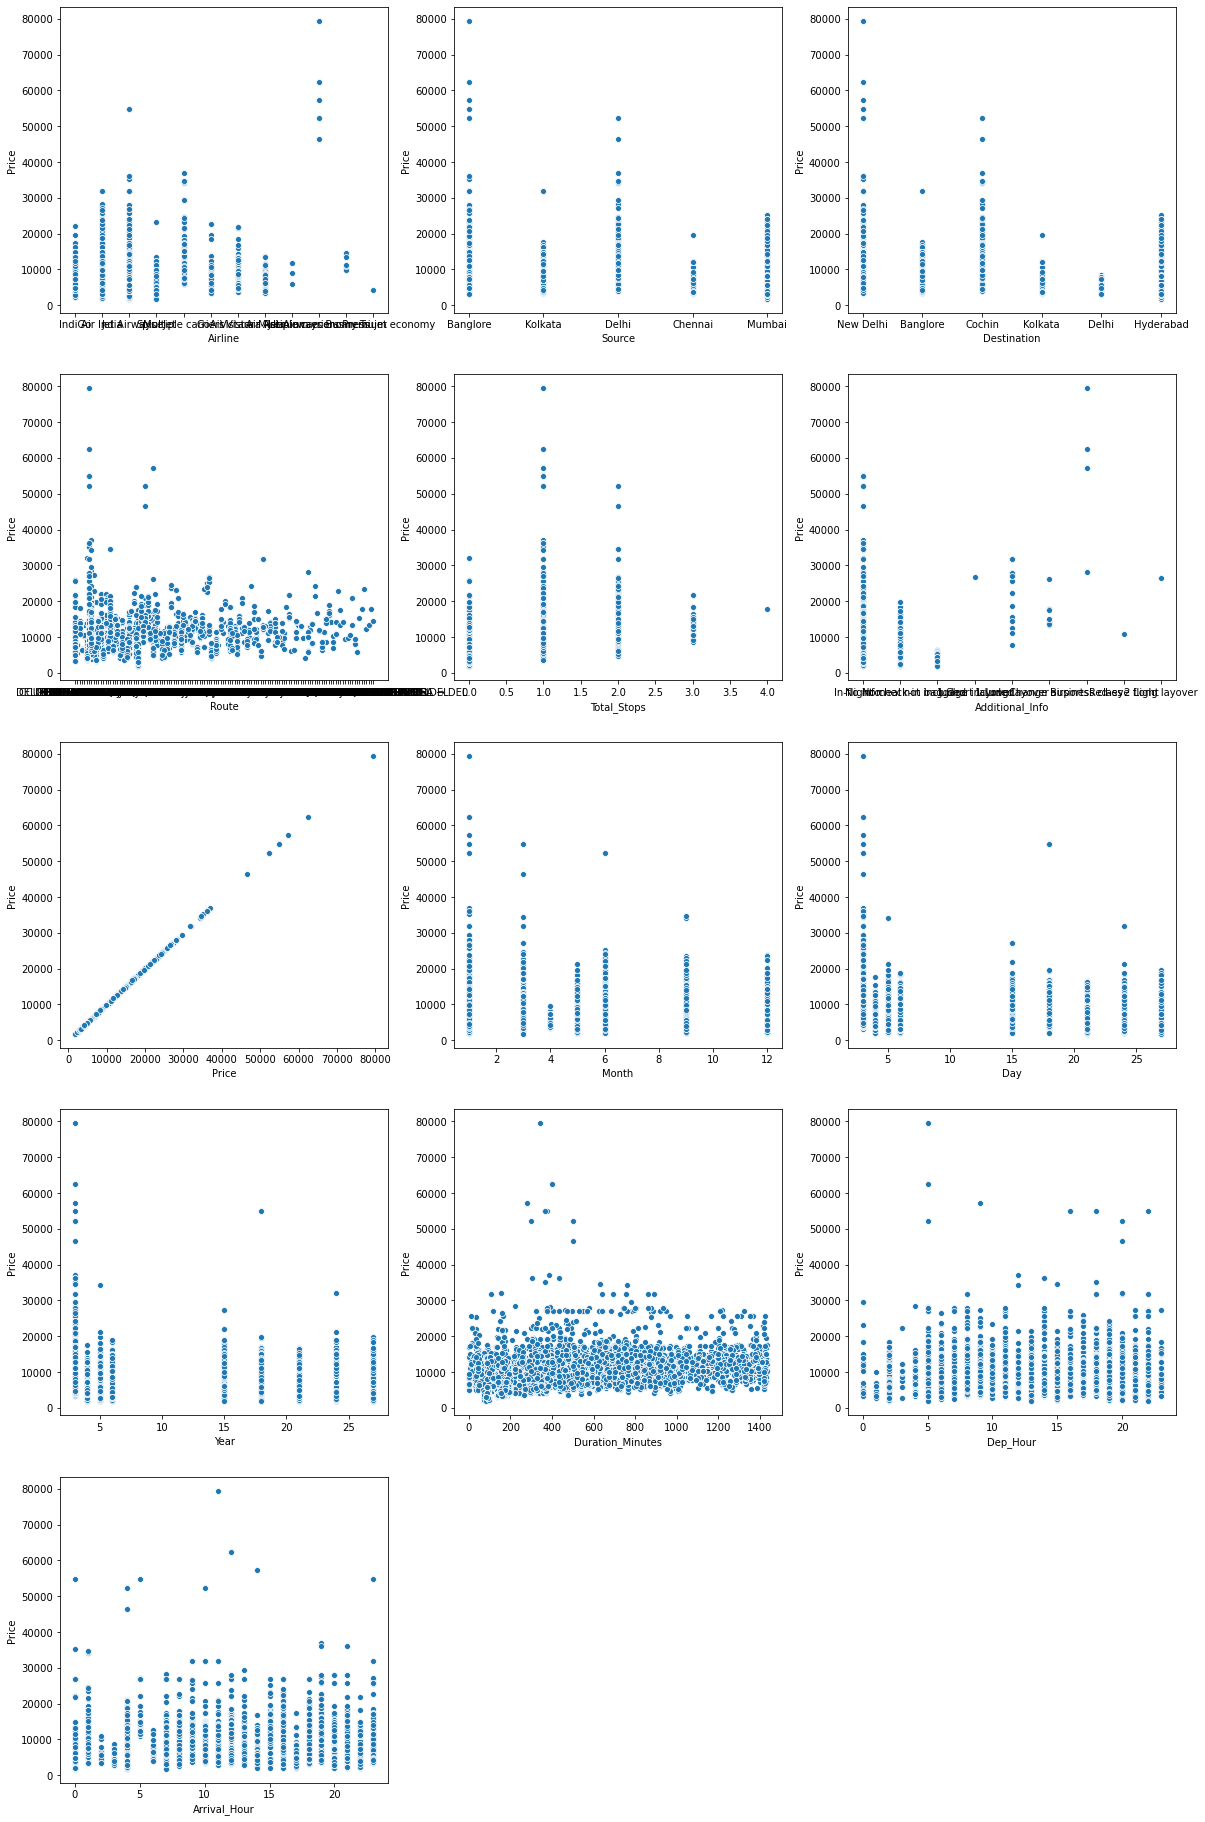

In [44]:
import seaborn as sns
count=1
plt.subplots(figsize=(20, 80))
for x in df.columns:
    plt.subplot(12,3,count)
    sns.scatterplot(df[x],df['Price'])
    count+=1

plt.show()

# Preprocessing

In [45]:
df = df.dropna().reset_index()

In [46]:
categorical = df[['Airline', 'Source', 'Destination', 'Additional_Info', 'Month', 'Dep_Hour', 'Arrival_Hour', 'Route']]
numerical = df[['Total_Stops', 'Day', 'Year', 'Duration_Minutes']]
target = df[['Price']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)

categorical_dummies = pd.get_dummies(categorical, drop_first=True)

In [47]:
X = pd.concat([numerical_scaled, categorical_dummies], axis=1)
y = target

In [48]:
train_columns = X.columns

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Neural Network

In [50]:
# X_test.shape

(2137, 162)

In [142]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from keras.layers.advanced_activations import PReLU

# #from tensorflow import keras

# model = keras.Sequential([
#     #keras.layers.Dense(13, activation=PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)),
#     keras.layers.Dense(600, activation='relu', input_dim=162, kernel_initializer='normal'),
#     keras.layers.Dense(800, activation='relu'),
#     keras.layers.Dense(720, activation='elu'),
#     keras.layers.Dense(800, activation='relu'),
#     keras.layers.Dense(600, activation='relu'),
#     keras.layers.Dense(250, activation='relu'),
#     keras.layers.Dense(25, activation=PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)),
#     keras.layers.Dense(1, activation='selu')
# ])

# model.compile(optimizer='adam', 
#               loss=tf.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
#               metrics=['MAPE'])



# history = model.fit(
#     X_train,
#     y_train,
#     batch_size=200,
#     epochs=1000,
#     validation_data=(X_test, y_test)
# )

Epoch 1/1000
43/43 [==============================] - 1s 25ms/step - loss: 38971728.0000 - MAPE: 58.4050 - val_loss: 16051432.0000 - val_MAPE: 35.8121
Epoch 2/1000
43/43 [==============================] - 1s 23ms/step - loss: 11953612.0000 - MAPE: 30.1356 - val_loss: 8649047.0000 - val_MAPE: 24.9202
Epoch 3/1000
43/43 [==============================] - 1s 22ms/step - loss: 7562183.0000 - MAPE: 21.1207 - val_loss: 6090220.5000 - val_MAPE: 19.2089
Epoch 4/1000
43/43 [==============================] - 1s 24ms/step - loss: 6331773.0000 - MAPE: 18.8413 - val_loss: 5214741.0000 - val_MAPE: 18.8597
Epoch 5/1000
43/43 [==============================] - 1s 23ms/step - loss: 5482277.0000 - MAPE: 17.2803 - val_loss: 4642526.5000 - val_MAPE: 16.2013
Epoch 6/1000
43/43 [==============================] - 1s 25ms/step - loss: 4937123.5000 - MAPE: 16.3414 - val_loss: 4188915.2500 - val_MAPE: 16.7160
Epoch 7/1000
43/43 [==============================] - 1s 26ms/step - loss: 4664553.5000 - MAPE: 16.1588

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [174]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [175]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [176]:
model = rf_random
#model = RandomForestRegressor()
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 32.7min finished
C:\Users\mcand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [177]:
model.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [178]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)



best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

<ipython-input-178-2d379f86ada3>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train, y_train)


Model Performance
Average Error: 4947.5192 degrees.
Accuracy = 29.48%.
Model Performance
Average Error: 4916.1982 degrees.
Accuracy = 29.93%.


In [182]:
predictions = model.predict(X_test)

r2_score(predictions, y_test)

0.9106470523081327

In [183]:
model = best_random

# Test Data

In [184]:
df = pd.read_excel('../Data/Test_set.xlsx')

In [185]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [186]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [187]:
df['Month'] = [x.month for x in df['Date_of_Journey']]
df['Day'] = [x.day for x in df['Date_of_Journey']]
df['Year'] = [x.day for x in df['Date_of_Journey']]

In [188]:
df['Duration_TD'] = [pd.Timedelta(x) for x in df['Duration']]
df['Duration_Minutes'] = [(x.seconds/60) for x in df['Duration_TD']]

In [189]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = [x.hour for x in df['Dep_Time']]

df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = [x.hour for x in df['Arrival_Time']]

In [190]:
df['Total_Stops'].unique()
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

In [191]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info', 'No info')

In [192]:
drop_columns = ['Date_of_Journey', 'Duration', 'Duration_TD', 'Dep_Time', 'Arrival_Time']

df = df.drop(columns=drop_columns)

# Preprocessing

In [193]:
categorical = df[['Airline', 'Source', 'Destination', 'Additional_Info', 'Month', 'Dep_Hour', 'Arrival_Hour', 'Route']]
numerical = df[['Total_Stops', 'Day', 'Year', 'Duration_Minutes']]

from sklearn.preprocessing import StandardScaler

numerical_scaled = scaler.fit_transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)

categorical_dummies = pd.get_dummies(categorical, drop_first=True)

In [194]:
X = pd.concat([numerical_scaled, categorical_dummies], axis=1)

In [195]:
test_columns = X.columns

In [196]:
#Fill missing columns
missing_cols = set(train_columns) - set(test_columns)

for x in missing_cols:
    X[x] = 0
    
X = X[train_columns]



In [197]:
predictions = model.predict(X)

In [198]:
submission = pd.DataFrame(predictions, columns=['Price'])
submission.to_excel('../Data/Submission.xlsx', index=False)